# 评估指标


参考：

- https://machine-learning-from-scratch.readthedocs.io/zh_CN/latest/%E6%A8%A1%E5%9E%8B%E8%AF%84%E4%BC%B0%E4%B8%8E%E6%A8%A1%E5%9E%8B%E8%B0%83%E4%BC%98.html


auc，召回，精确。。。。

准确率 - accuracy

精确率 - precision

召回率 - recall

F1值 - F1-score

ROC曲线下面积 - ROC-AUC （area under curve）

PR曲线下面积 - PR-AUC

## 混淆矩阵

<table>
   <tr>
      <td></td>
      <td></td>
      <td>Ground Truth</td>
      <td></td>
   </tr>
   <tr>
      <td></td>
      <td></td>
      <td>Positive</td>
      <td>Negative</td>
   </tr>
   <tr>
      <td>预测结果</td>
      <td>TRUE</td>
      <td>11</td>
      <td>10</td>
   </tr>
   <tr>
      <td></td>
      <td>FALSE</td>
      <td>01</td>
      <td>00</td>
   </tr>
   <tr>
      <td></td>
   </tr>
</table>

## 准确率 - accuracy

$ acc = \frac {预测正确的个数}{预测数据集中数据个数}$

acc = 预测正确的个数÷预测数据集中数据个数

binary classification 且正反例不平衡的情况下，尤其是我们对minority class 更感兴趣的时候，accuracy评价基本没有参考价值。什么fraud detection（欺诈检测），癌症检测，都符合这种情况。举个栗子：在测试集里，有100个sample，99个反例，只有1个正例。如果我的模型不分青红皂白对任意一个sample都预测是反例，那么我的模型的accuracy是 正确的个数／总个数 = 99/100 = 99%


## 精确率 - precision

$precision = \frac {预测正确的正例个数} {预测为正例的个数}$

假设你的模型一共预测了100个正例，而其中80个是对的正例，那么你的precision就是80%。我们可以把precision也理解为，当你的模型作出一个新的预测时，它的confidence score 是多少，或者它做的这个预测是对的的可能性是多少。

## 召回率 - recall

$recall = \frac {预测正确的正例个数} {预测数据集中所有正例个数}$

假设测试集里面有100个正例，你的模型能预测覆盖到多少，如果你的模型预测到了40个正例，那你的recall就是40%。

如果你的模型很贪婪，想要覆盖更多的sample，那么它就更有可能犯错。在这种情况下，你会有很高的recall，但是较低的precision。如果你的模型很保守，只对它很sure的sample作出预测，那么你的precision会很高，但是recall会相对低。这样一来呢，我们可以选择只看我们感兴趣的class，就是minority class的precision，recall来评价模型的好坏。


## F1值 - F1-score

综合考虑precision和recall的metric：

$F_1 = \frac{2*precision*recall}{precision+recall}$

两个模型，一个precision特别高，recall特别低，另一个recall特别高，precision特别低的时候，f1-score可能是差不多的.

# ROC曲线

灵敏度sensitivity = recall = true positive rate

特异性specificity = 1- false positive rate

以上二者是条件于真实label Y的概率，所以无论Y的真实概率为多少，都不会影响他们。所以他们**不受数据均衡度影响**。但是precision会被数据均衡度影响。

ROC曲线以recall(true positive rate)为纵轴，以false positive rate为横轴，取不同threshold（判断正例的阈值）点画图。

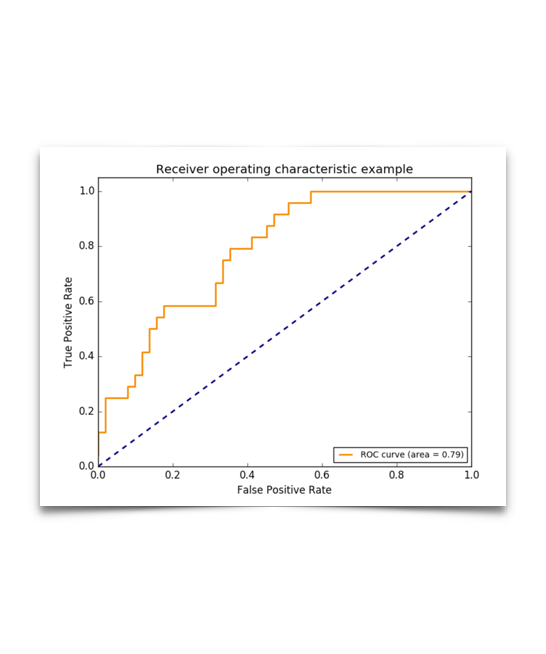

最优的threshold就是橙色曲线离蓝色虚线（基准线）最远的一点啦，或者橙色曲线上离左上角最近的一点，再或者是根据用户自己定义的cost function来的。

## 图解ROC

step1：给定样本如图A，绿色为+1样本,红色为-1样本

step2：使用ML模型分类后，每个样本得到一个`[0,1]`间 pred 概率，如图B

![step2](../imgs/roc1.jpg)

step3：人为指定阈值，高于阈值的为+1，低于阈值为-1。当阈值分别为0.35,0.5,0.65时，得到以下分类结果。

![step3](../imgs/roc2.jpg)

一般取阈值为0.5.通过step3中的图可以看出，不同的阈值直接影响分类结果：

- 1. threshold=0.35：正样本全预测正确，负样本有两个预测错误

- 2. threshold=0.50：正样本有一个预测错误，负样本有一个预测错误

- 3. threshold=0.65：正样本有两个预测错误，负样本全预测正确

综上所述，**+1样本被预测的概率集中在倾向与1的一方，-1样本被预测的概率集中在倾向0的一方；正负样本的概率尽量不存在互相渗透的现象**（但是step3图中还是有杂揉现象）

何谓渗透？

![渗透例图](../imgs/roc3.jpg)

当给两个模型指定一个随机阈值的时候：

![渗透例图2](../imgs/roc4.jpg)

直观上，很明显地，左图的预测结果，要比右图好，因为当左图的分割线恰好在两个分布中央的时候，正样本和负样本都完全被预测正确，而右图无论怎么找阈值，都找不到一个这样的阈值能够完全把两类样本分割开。

故，**遍历所有阈值可以查看模型对两类数据的区分度是否够大，类间距是否明显**。

设，横坐标——假正例（-1样本被预测为+1的个数），纵坐标——真正例（+1样本被预测为+1的个数）

如下图所示，阈值从高往低取

![渗透例图3](../imgs/roc5.jpg)

最后一图就是roc曲线，AUC=ROC曲线下面积÷在x×y区域面积

![auc1](../imgs/auc1.png)

AUC解法如下：

- 解法1：可以先归一化x轴和y轴，进而计算这个面积得到auc=0.88，如D(2)；
- 解法2：也可以直接采用数格子的方法就可以了D(3)，即 22/25 = 0.88

# AUC

Auc体现出容忍样本倾斜的能力,只反应模型对正负样本排序能力的强弱,而其直观含以上是任意取一个正样本和负样本,正样本的得分大于负样本的概率。

AUC:ROC曲线下面积。

如何理解呢？

答：实际上，这可以理解为一种积分过程，积分的内容是啥呢：
每个预测为正的样本，能比多少个负样本大。
积分所在的区域是啥呢？实际是正样本和负样本的交叉，也即
正样本数∗负样本数

AUC越大（曲线更接近左上角true positive rate=1， false positive rate=0），模型越理想。

ROC可以回答：不论class的基本概率怎么样，我的模型in general能表现得多好。

假设一种理想状态：

![auc1](../imgs/roc6.jpg)

+1和-1样本互不纠缠，所以遍历所有阈值，每个+1的预测概率逗比-1样本的预测概率大，在roc曲线下积分结果为N+N+N+N...= M\*N,而积分区域是M\*N，所以理想状态下:

$AUC=\frac{\sum_{i=1}^{M}N}{M*N}=1$

因此这里我们可用通过这种方式重新计算第一节中的AUC


第一节中，原始有五个正样本：

p=0.9的真实正样本，它在所有5个负样本前面，因此记为5

p=0.8的真实正样本，它在所有5个负样本前面，因此记为5

p=0.7的真实正样本，它在所有5个负样本前面，因此记为5

p=0.6的真实正样本，它在4个负样本前面，因此记为4

p=0.4的真实正样本，它在3个负样本前面，因此记为3

交叉区域记为5\*5=25

因此最终的AUC记为

$AUC=\frac{5+5+5+4+3}{5*5}=0.88$

总结公式为$AUC=\frac{\sum_{i \in PositiveClass}    rank_{i} - \frac{M*(1+M)}{2}}{M*N}$

# GAUC

推荐模型时一个更细粒度的二分类。传统AUC评判二分类，但是推荐领域要算每个人的二分类结果。

AUC表示正样本得分比负样本得分高的概率。

在CTR实际应用场景中，CTR预测常被用于对每个用户候选广告的排序。但是**不同用户之间存在差异**：有些用户天生就是点击率高。**以往的评价指标对样本不区分用户地进行AUC的计算**。论文采用的GAUC实现了用户级别的AUC计算，**在单个用户AUC的基础上，按照点击次数或展示次数进行加权平均，消除了用户偏差对模型的影响**，更准确的描述了模型的表现效果：

$$GAUC=\frac{\sum_{i=1}^{n}w_{i}\times AUC_{i}}{\sum_{i=1}^{n}w_{i}}=\frac{\sum_{i=1}^{n}{impression}_{i}\times AUC_{i}}{\sum_{i=1}^{n}{impression}_{i}}$$

其中权重$w$既可以是展示次数(impression)也可以是点击次数(clicks)。$n$是用户数量,$i$遍历每个用户。

注：点击对于用户而言没有成本，所以愿意点的就多点，不愿意点的就少点，与逾期什么的不一样。

例如：

| |iphone(+)|huawei(+)|xiaomi(-)|
|  ----  | ----  | ---- | ---- |
|userA|0.5| | 0.3|
|userB|0.4|0.2|0.1|

对于所有出现的概率值：我们可以计算得到AUC为$ \frac{2+2+1}{2*3}=\frac{5}{6}=0.833 $，好像预测效果不太好。但是，如果对每个用户查看AUC，则有：
用户A $auc = \frac{1}{1*1} = 1$
用户B $auc = \frac{1+1}{2*1} = 1$
也就是说这个模型其实预测地很完美！

这和实际的auc的结果矛盾。

**可能auc这个指标失真了，因为用户广告之间的排序是个性化的，不同用户的排序结果不太好比较，这可能导致全局auc并不能反映真实情况。**

因为auc反映的是整体样本间的一个排序能力，而在计算广告领域，我们**实际要衡量的是不同用户对不同广告之间的排序能力**， 实际**更关注的是同一个用户对不同广告间的排序能力**，为此，参考了阿里妈妈团队之前有使用的group auc的评价指标。 **group auc实际是计算每个用户的auc，然后加权平均，最后得到group auc，这样就能减少不同用户间的排序结果不太好比较这一影响**。

一般计算时，会**过滤掉单个用户全是正样本或负样本的情况**。

但是实际上一般还是主要看auc这个指标，但是当发现auc不能很好的反映模型的好坏(比如auc增加了很多，实际效果却变差了)，这时候可以看一下gauc这个指标。

# KS

https://zhuanlan.zhihu.com/p/88708071

- ROC值一般在0.5-1.0之间。值越大表示模型判断准确性越高，即越接近1越好。ROC=0.5表示模型的预测能力与随机结果没有差别。
- KS值表示了模型将+和-区分开来的能力。值越大，模型的预测准确性越好。一般，KS>0.2即可认为模型有比较好的预测准确性。

从统计角度，我们知道KS是**分析两组数据分布是否相同的检验指标**。在金融领域中，我们的**y值和预测得到的违约概率刚好是两个分布未知的两个分布**。好的信用风控模型一般从**准确性、稳定性和可解释性**来评估模型。

KS用于模型风险区分能力进行评估，KS指标衡量的是**好坏样本累计分布之间的差值**。

为什么需要KS值：

>用处： 作为一个常识，我们应该知道信用分的分布应该符合正态分布，也就是说接近5的人和接近0的人应该是极少极少的，大部分都在2到4之间。
信用分是0到5，那现在想知道，如果我们要贷款给用户，那把钱贷给信用分为多少的人呢？
在选择这个值的时候，我们需要考虑是希望能把钱贷给尽可能多的好人和尽可能少的坏人。如果我们选择信用分大于4的人，也许确实能过滤掉大部分坏人，但好人也被过滤掉了，用户也就少了。
这个时候我们就需要ks值了。


横轴：阈值or数据集百分比

纵轴：TPR（真正率）与FPR（假正率） 风控模型中 黑样本是正例

- 真正类率（TPR）:预测的正类中实际**正**实例占**所有正**实例的比例.

- 负正类率（FPR）:预测的正类中实际**负**实例占**所有负**实例的比例。

而我们的目标就是希望找到一个值，区分bad和good用户，使真阳率尽可能大，假阳率尽可能小。



![ks1](../imgs/ks1.jpg)

如上图所示，在横坐标2.5处，找到了我们的ks值0.4，在这个点我们找到了70%的真实坏人，而且只把30%的好人误认为是坏人了。 ks=70% - 30%; 相对于其它点来说已经是最好的了。

所以，ks值是越大越好的，再考虑极端情况，如果有模型能找到所有的坏人(也就是f(bad)=100%)，并且没有误判任何一个好人f(good)=0，那么它的ks值就=1了，属于完美模型了。 当然，对于风控模型，因为信用分几乎都符合正态分布，是不可能出现这种情况的，也只能说越大越好

## KS值

![](../imgs/ks2.jpg)

我们想要评估模型的能力，在阈值不同的情况下，TPR和FPR 又不一样，突然迷惘起来，这个时候，需要找到一个唯一评判标准，最值有唯一性，上图红色部分表示TPR-FPR，那我们就用**最高点作为模型能力的评估标准**（KS值）吧！！对，没有错，最高点就是所谓的KS值，我们用KS值来作为评估模型区分能力的指标，**KS值越大，模型的区分能力越强**。公式如下：

$KS = max(TPR-FPR)$